In [1]:
import numpy as np 
import pandas as pd

In [2]:
dataset =pd.read_csv("layoffs_data.csv")

In [3]:
dataset.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Opendoor,SF Bay Area,Real Estate,560.0,0.22,2023-04-18,https://www.inman.com/2023/04/18/opendoor-lays...,1900.0,Post-IPO,2023-04-18 17:55:14,United States,Unknown
1,Culture Amp,Melbourne,HR,NaN,0.09,2023-04-18,https://www.cultureamp.com/company/announcemen...,257.0,Series F,2023-04-19 00:21:55,Australia,Unknown
2,Noon,Riyadh,Retail,NaN,0.10,2023-04-18,https://yourstory.com/ys-gulf/noon-lays-off-10...,NaN,Unknown,2023-04-19 00:23:39,Saudi Arabia,Unknown
3,Ten Square Games,Wrocław,Consumer,120.0,0.25,2023-04-17,https://economictimes.indiatimes.com/tech/tech...,NaN,Seed,2023-04-18 04:44:03,Poland,Unknown
4,Ynsect,Paris,Food,17.0,0.25,2023-04-17,https://pitchbook.com/news/articles/agtech-yns...,579.0,Series D,2023-04-18 04:45:17,France,Unknown


# Preprocessing the data:

# Removing unnecessary columns:

In [4]:
dataset = dataset.drop(['Source','List_of_Employees_Laid_Off','Date_Added'],axis=1)
dataset.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country
0,Opendoor,SF Bay Area,Real Estate,560.0,0.22,2023-04-18,1900.0,Post-IPO,United States
1,Culture Amp,Melbourne,HR,NaN,0.09,2023-04-18,257.0,Series F,Australia
2,Noon,Riyadh,Retail,NaN,0.10,2023-04-18,NaN,Unknown,Saudi Arabia
3,Ten Square Games,Wrocław,Consumer,120.0,0.25,2023-04-17,NaN,Seed,Poland
4,Ynsect,Paris,Food,17.0,0.25,2023-04-17,579.0,Series D,France


# Filling missing values:

In [5]:
# first we'll list down the columns that contain missing values:

In [6]:
# creating a boolean mask indicating which values are missing:
mask = dataset.isna()
# use the any() method to check which columns have at least one missing value:
columns_with_missing_value = mask.any()
print(columns_with_missing_value)

Company           False
Location_HQ       False
Industry          False
Laid_Off_Count     True
Percentage         True
Date               True
Funds_Raised       True
Stage             False
Country           False
dtype: bool


In [7]:
# Now we'll be filling the missing values accordingly(according to the column):

In [8]:
dataset['Laid_Off_Count'] = dataset['Laid_Off_Count'].fillna(dataset['Laid_Off_Count'].mean())
dataset['Percentage'] = dataset['Percentage'].fillna(dataset['Percentage'].mean())
dataset['Funds_Raised'] = dataset['Funds_Raised'].fillna(dataset['Funds_Raised'].mean())
# To fill the Date column missing values we'll first convert the date column to datetime object and then 'fill' missing
# values in 'date' column with previous value:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date'] = dataset['Date'].fillna(method='ffill')
                                                             

In [9]:
dataset.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country
0,Opendoor,SF Bay Area,Real Estate,560.000000,0.22,2023-04-18,1900.000000,Post-IPO,United States
1,Culture Amp,Melbourne,HR,252.412587,0.09,2023-04-18,257.000000,Series F,Australia
2,Noon,Riyadh,Retail,252.412587,0.10,2023-04-18,817.879266,Unknown,Saudi Arabia
3,Ten Square Games,Wrocław,Consumer,120.000000,0.25,2023-04-17,817.879266,Seed,Poland
4,Ynsect,Paris,Food,17.000000,0.25,2023-04-17,579.000000,Series D,France


# Now to do the recession analysis,a more accurate measure woud be percentage of people laid off than laid_off_count itself.To see how different features impact the percentage of people laid off,we'll have to find the number of people laid off for particular industry,location etc.

In [10]:
industry_laid_off_counts = dataset.groupby('Industry')['Laid_Off_Count'].sum()
industry_laid_off_counts = industry_laid_off_counts.sort_values(ascending=False)
print(industry_laid_off_counts)

Industry
Retail            71604.055944
Consumer          65096.440559
Finance           53190.545455
Other             50644.454545
Transportation    46848.916084
Healthcare        44333.230769
Food              37825.391608
Real Estate       29684.566434
Hardware          26974.888112
Travel            22459.664336
Crypto            21638.741259
Education         21293.790210
Marketing         20574.503497
Sales             14225.650350
Media             14018.615385
Data              13886.202797
HR                12504.139860
Fitness           11422.125874
Infrastructure    11085.664336
Security          10942.839161
Logistics          7054.951049
Support            6804.363636
Construction       5125.062937
Recruiting         4052.062937
Product            4009.538462
Energy             2316.475524
Legal              1593.237762
Aerospace          1165.825175
Manufacturing       380.412587
Unknown             294.412587
Name: Laid_Off_Count, dtype: float64


In [11]:
location_laid_off_counts = dataset.groupby('Location_HQ')['Laid_Off_Count'].sum()
location_laid_off_counts = location_laid_off_counts.sort_values(ascending=False)
print(location_laid_off_counts)

Location_HQ
SF Bay Area      191463.804196
Seattle           52447.615385
New York City     49913.419580
Bengaluru         25962.776224
Boston            21302.090909
                     ...      
Kiel                 21.000000
Cork                 21.000000
Kansas City          20.000000
Gydnia               13.000000
Indianapolis          5.000000
Name: Laid_Off_Count, Length: 206, dtype: float64


In [12]:
country_laid_off_counts = dataset.groupby('Country')['Laid_Off_Count'].sum()
country_laid_off_counts = country_laid_off_counts.sort_values(ascending=False)
print(country_laid_off_counts)

Country
United States     434794.860140
India              44450.139860
Netherlands        18229.650350
United Kingdom     16540.377622
Brazil             12915.125874
                      ...      
Bulgaria             120.000000
Romania               80.000000
Lithuania             60.000000
Thailand              55.000000
Ukraine               50.000000
Name: Laid_Off_Count, Length: 62, dtype: float64


# Now let's visualize the obtained result via donut charts:

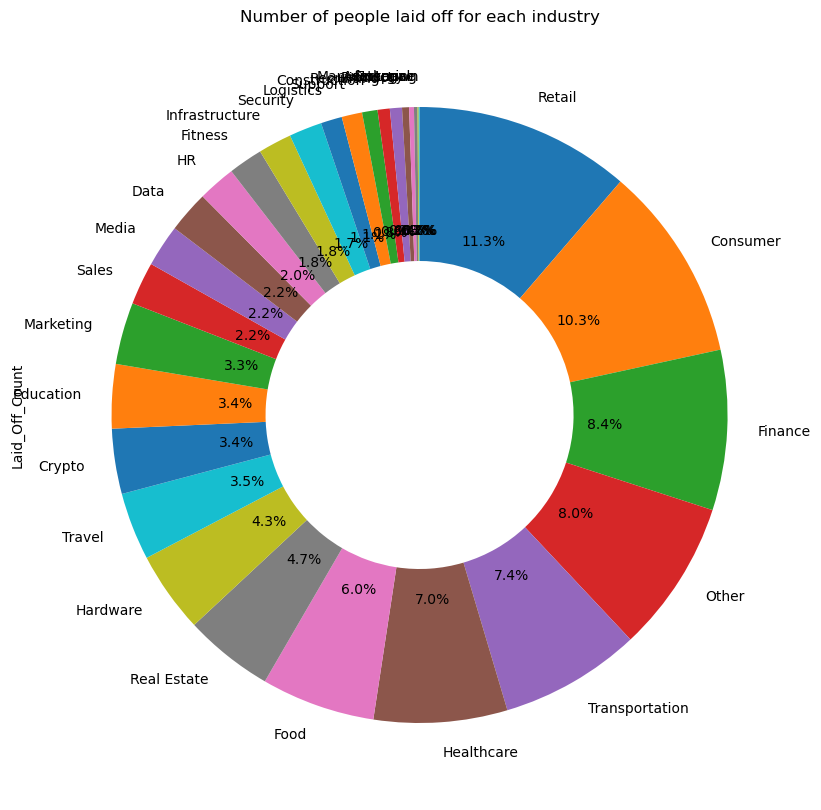

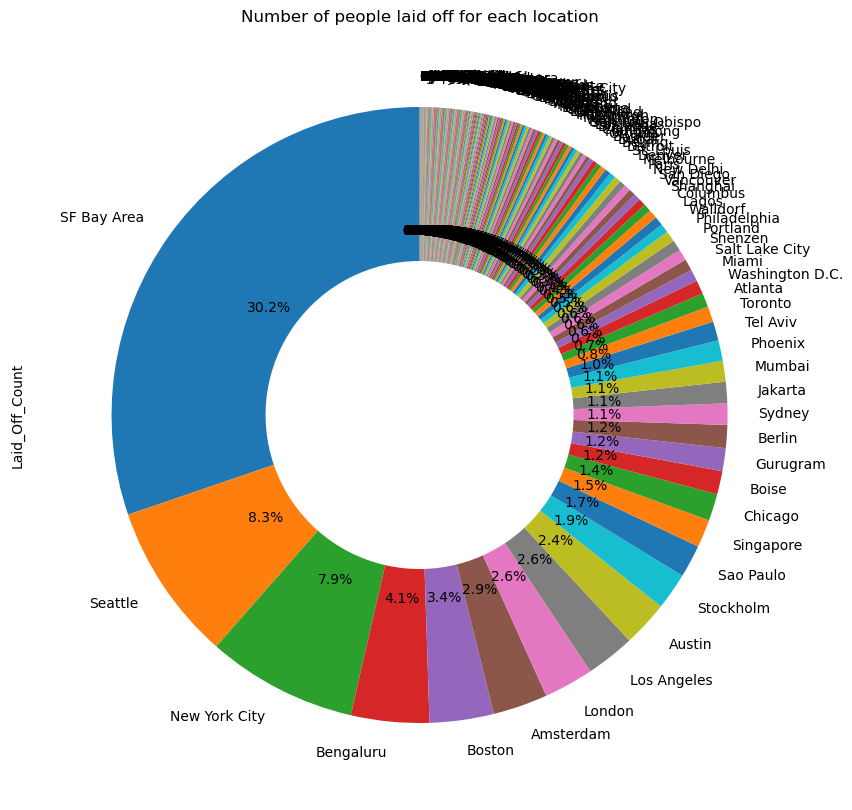

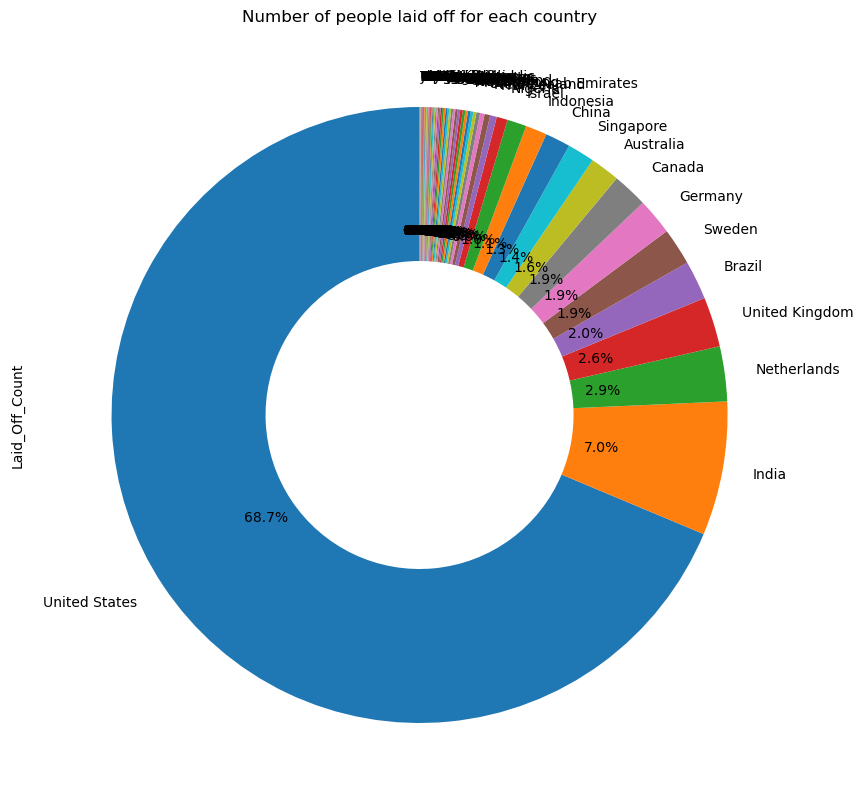

In [13]:
import matplotlib.pyplot as plt
# split industries into groups
# groups = [dataset['Industry'][i:i+10] for i in range(0, len(dataset['Industry']), 10)]
# # create a donut chart for each group of industries
# for i, group in enumerate(groups):
#     # get data for the current group of industries
#     data = dataset[dataset['Industry'].isin(group)]
#     values = dataset['Laid_Off_Count']
#     labels = dataset['Industry']
    
#     # create a donut chart
#     fig, ax = plt.subplots(figsize=(8, 8))
#     ax.pie(values, labels=labels, wedgeprops={'width': 0.5})
#     ax.set_title(f'Laid Off Count for Industries {i*10}-{i*10+len(group)-1}')
    
#     plt.show()


industry_laid_off_counts.plot(kind='pie',subplots=True,figsize=(10,10),autopct='%1.1f%%',startangle=90,counterclock=False,legend=False,stacked=True,wedgeprops={'width':0.5})
plt.title('Number of people laid off for each industry')
plt.show()
location_laid_off_counts.plot(kind='pie',figsize=(10,10),autopct='%1.1f%%',startangle=90,wedgeprops={'width':0.5})
plt.title('Number of people laid off for each location')
plt.show()
country_laid_off_counts.plot(kind='pie',figsize=(10,10),autopct='%1.1f%%',startangle=90,wedgeprops={'width':0.5})
plt.title('Number of people laid off for each country')
plt.show()

# Now let's do analysis of laid off count by country.We see that a majority of people have been laid off in America followed by India,Netherlands etc.We'll be seeing the factors affecting the lay off in top 5 five countries with most layoffs:

In [14]:
country_laid_off_counts_top_five = country_laid_off_counts[:5]

In [15]:
country_laid_off_counts_top_five

Country
United States     434794.860140
India              44450.139860
Netherlands        18229.650350
United Kingdom     16540.377622
Brazil             12915.125874
Name: Laid_Off_Count, dtype: float64

# In our original dataset we have the lay off count as well as the percentage(i.e the people who have been laid off account to what percentage of total number of employees in the company).We'll use these two informations to find total number of people in the organization.Then we'll be utilizing this information to calculate the total number of people across different industries in the top five countries that have been worstly affected by layoff and will find out what percentage of people have suffered from every industry in these countries.

In [16]:
# finding total number of people in each organization :
employee_count = (dataset['Laid_Off_Count'] * 100)/dataset['Percentage']
employee_count
dataset_copy = dataset
dataset_copy['employee_count']= employee_count
dataset_copy

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,employee_count
0,Opendoor,SF Bay Area,Real Estate,560.000000,0.220000,2023-04-18,1900.000000,Post-IPO,United States,254545.454545
1,Culture Amp,Melbourne,HR,252.412587,0.090000,2023-04-18,257.000000,Series F,Australia,280458.430458
2,Noon,Riyadh,Retail,252.412587,0.100000,2023-04-18,817.879266,Unknown,Saudi Arabia,252412.587413
3,Ten Square Games,Wrocław,Consumer,120.000000,0.250000,2023-04-17,817.879266,Seed,Poland,48000.000000
4,Ynsect,Paris,Food,17.000000,0.250000,2023-04-17,579.000000,Series D,France,6800.000000
...,...,...,...,...,...,...,...,...,...,...
2503,HopSkipDrive,Los Angeles,Transportation,8.000000,0.100000,2020-03-13,45.000000,Unknown,United States,8000.000000
2504,Panda Squad,SF Bay Area,Consumer,6.000000,0.750000,2020-03-13,1.000000,Seed,United States,800.000000
2505,Tamara Mellon,Los Angeles,Retail,20.000000,0.400000,2020-03-12,90.000000,Series C,United States,5000.000000
2506,EasyPost,Salt Lake City,Logistics,75.000000,0.260786,2020-03-11,12.000000,Series A,United States,28759.187203


# Grouping data on the basis of industry to find the total employee count and laid off count for every industry in order to find the total percentage of people laid off in every industry for the five top countries which have been worstly affected by layoffs:

In [17]:
# extracting information regarding the top five worstly affected countries and storing them in separate dataframes:

USA_dataset = dataset_copy[dataset_copy['Country']=='United States']
India_dataset = dataset_copy[dataset_copy['Country']=='India']
Netherlands_dataset = dataset_copy[dataset_copy['Country']=='Netherlands']
United_Kingdom_dataset = dataset_copy[dataset_copy['Country']=='United Kingdom']
Brazil_dataset = dataset_copy[dataset_copy['Country']=='Brazil']

# For USA:

In [18]:
# finding employee and layoff count (industry wise) in USA:

employee_count_by_industry_USA = USA_dataset.groupby('Industry')['employee_count'].sum()
laid_off_count_by_industry_USA = USA_dataset.groupby('Industry')['Laid_Off_Count'].sum()

In [19]:
# Sorting employee count (industry wise) for USA in descending order:
employee_count_by_industry_USA = employee_count_by_industry_USA.sort_values(ascending=False)
employee_count_by_industry_USA

Industry
Retail            9.397472e+07
Hardware          5.041142e+07
Consumer          4.291228e+07
Other             3.572444e+07
Sales             2.663092e+07
Transportation    2.107577e+07
Finance           2.033484e+07
Healthcare        1.616851e+07
Real Estate       1.339499e+07
Marketing         1.194915e+07
Infrastructure    1.190455e+07
Food              1.119531e+07
Data              9.680212e+06
Media             8.154639e+06
HR                7.596083e+06
Security          7.189476e+06
Logistics         5.698720e+06
Crypto            5.690796e+06
Fitness           4.901260e+06
Travel            3.850897e+06
Education         2.826368e+06
Recruiting        2.675263e+06
Product           2.443229e+06
Construction      2.037340e+06
Legal             9.401415e+05
Energy            5.438489e+05
Aerospace         3.073889e+05
Manufacturing     1.782023e+05
Unknown           1.682751e+05
Support                    NaN
Name: employee_count, dtype: float64

In [20]:
# Sorting layoff count (industry wise) for USA in descending order:
laid_off_count_by_industry_USA = laid_off_count_by_industry_USA.sort_values(ascending=False)
laid_off_count_by_industry_USA

Industry
Consumer          54665.489510
Retail            54087.153846
Other             30366.265734
Healthcare        29747.755245
Finance           28462.153846
Transportation    27784.076923
Real Estate       25442.090909
Hardware          25342.475524
Food              17737.664336
Marketing         14318.615385
Sales             13865.650350
Crypto            11446.314685
Data              11386.902098
HR                10235.076923
Infrastructure    10148.426573
Travel             9417.538462
Media              9403.489510
Fitness            9377.713287
Security           8901.776224
Education          6363.013986
Support            5921.951049
Logistics          4631.713287
Construction       3834.825175
Recruiting         3827.062937
Product            3744.538462
Legal              1563.237762
Energy             1424.237762
Aerospace           714.825175
Manufacturing       380.412587
Unknown             252.412587
Name: Laid_Off_Count, dtype: float64

In [21]:
# finding the layoff percentage for every industry in USA and sorting it in descending order:
industry_wise_layoff_percentage_USA = ((laid_off_count_by_industry_USA)/(employee_count_by_industry_USA))*100
industry_wise_layoff_percentage_USA = industry_wise_layoff_percentage_USA.sort_values(ascending=False)
industry_wise_layoff_percentage_USA

Industry
Energy            0.261881
Travel            0.244554
Aerospace         0.232548
Education         0.225130
Manufacturing     0.213472
Crypto            0.201137
Fitness           0.191333
Real Estate       0.189937
Construction      0.188227
Healthcare        0.183986
Legal             0.166277
Food              0.158438
Product           0.153262
Unknown           0.150000
Recruiting        0.143054
Finance           0.139967
HR                0.134742
Transportation    0.131829
Consumer          0.127389
Security          0.123817
Marketing         0.119830
Data              0.117631
Media             0.115315
Infrastructure    0.085248
Other             0.085001
Logistics         0.081276
Retail            0.057555
Sales             0.052066
Hardware          0.050271
Support                NaN
dtype: float64

# Creating a bar graph depicting the industry wise layoff percentage in USA:

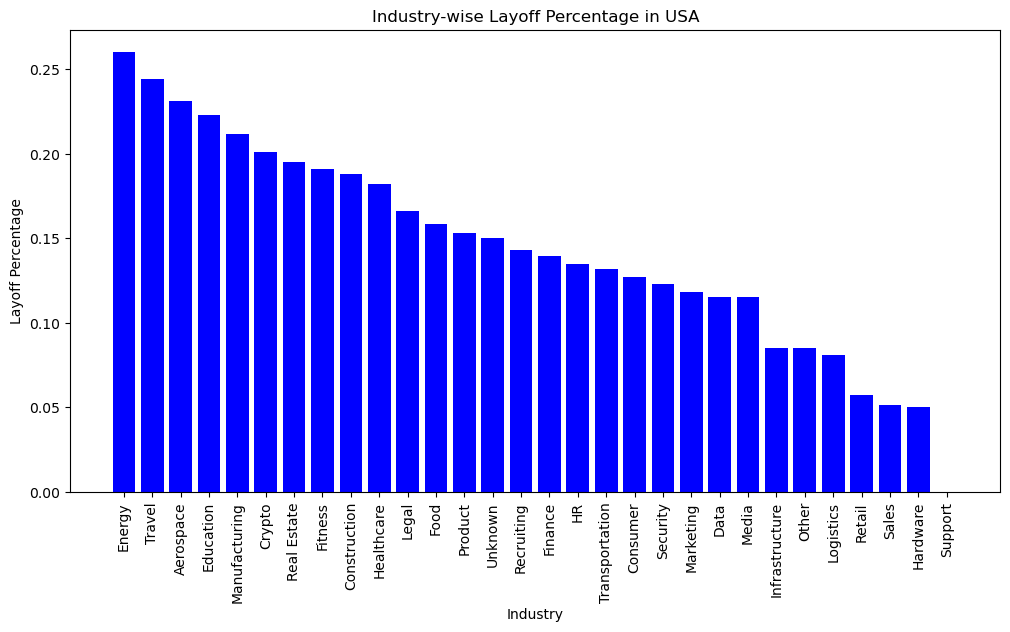

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Industry': ['Energy', 'Travel', 'Aerospace', 'Education', 'Manufacturing',
                 'Crypto', 'Real Estate', 'Fitness', 'Construction', 'Healthcare',
                 'Legal', 'Food', 'Product', 'Unknown', 'Recruiting', 'Finance',
                 'HR', 'Transportation', 'Consumer', 'Security', 'Marketing', 'Data',
                 'Media', 'Infrastructure', 'Other', 'Logistics', 'Retail', 'Sales',
                 'Hardware', 'Support'],
    'Layoff Percentage': [0.260302, 0.244248, 0.231316, 0.222929, 0.211887,
                          0.200932, 0.194910, 0.191026, 0.188063, 0.182208,
                          0.166133, 0.158162, 0.153060, 0.150000, 0.143010, 0.139452,
                          0.134663, 0.131788, 0.127244, 0.122854, 0.118517, 0.115542,
                          0.115357, 0.085342, 0.085058, 0.081074, 0.057571, 0.051312,
                          0.050278, 0]
}

industry_wise_layoff_percentage = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
plt.bar(industry_wise_layoff_percentage['Industry'], industry_wise_layoff_percentage['Layoff Percentage'], color='b')
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Layoff Percentage')
plt.title('Industry-wise Layoff Percentage in USA')
plt.show()


# For India:

In [23]:
# finding employee and layoff count (industry wise) in India:

employee_count_by_industry_India = India_dataset.groupby('Industry')['employee_count'].sum()
laid_off_count_by_industry_India = India_dataset.groupby('Industry')['Laid_Off_Count'].sum()

In [24]:
# Sorting employee count (industry wise) for India in descending order:
employee_count_by_industry_India = employee_count_by_industry_India.sort_values(ascending=False)
employee_count_by_industry_India

Industry
Education         1.048408e+07
Food              6.959151e+06
Transportation    2.930103e+06
Retail            2.693023e+06
Travel            1.443627e+06
Consumer          1.272576e+06
Finance           1.180964e+06
Healthcare        8.391970e+05
Fitness           6.308058e+05
Media             3.704825e+05
Logistics         2.482193e+05
Marketing         1.854367e+05
Other             1.817034e+05
Real Estate       1.458640e+05
Support           1.387641e+05
Crypto            1.209177e+05
HR                5.067647e+04
Recruiting        5.000000e+04
Construction      2.800000e+04
Data              1.533823e+04
Name: employee_count, dtype: float64

In [25]:
# Sorting layoff count (industry wise) for India in descending order:
laid_off_count_by_industry_India = laid_off_count_by_industry_India.sort_values(ascending=False)
laid_off_count_by_industry_India

Industry
Education         12178.300699
Transportation     5527.237762
Food               5474.650350
Retail             4794.650350
Finance            3673.412587
Consumer           2950.000000
Travel             2752.412587
Healthcare         2054.237762
Fitness            1100.000000
Media               704.825175
Logistics           680.000000
Other               500.000000
Crypto              492.412587
Marketing           461.000000
Real Estate         350.000000
Support             257.000000
Recruiting          200.000000
Construction        140.000000
HR                  120.000000
Data                 40.000000
Name: Laid_Off_Count, dtype: float64

In [26]:
# finding the layoff percentage for every industry in India and sorting it in descending order:
industry_wise_layoff_percentage_India = ((laid_off_count_by_industry_India)/(employee_count_by_industry_India))*100
industry_wise_layoff_percentage_India = industry_wise_layoff_percentage_India.sort_values(ascending=False)
industry_wise_layoff_percentage_India

Industry
Construction      0.500000
Crypto            0.407229
Recruiting        0.400000
Finance           0.311052
Other             0.275174
Logistics         0.273951
Data              0.260786
Marketing         0.248602
Healthcare        0.244786
Real Estate       0.239950
HR                0.236796
Consumer          0.231813
Travel            0.190660
Media             0.190245
Transportation    0.188636
Support           0.185206
Retail            0.178040
Fitness           0.174380
Education         0.116160
Food              0.078668
dtype: float64

# Creating a bar graph depicting the industry wise layoff percentage in India:

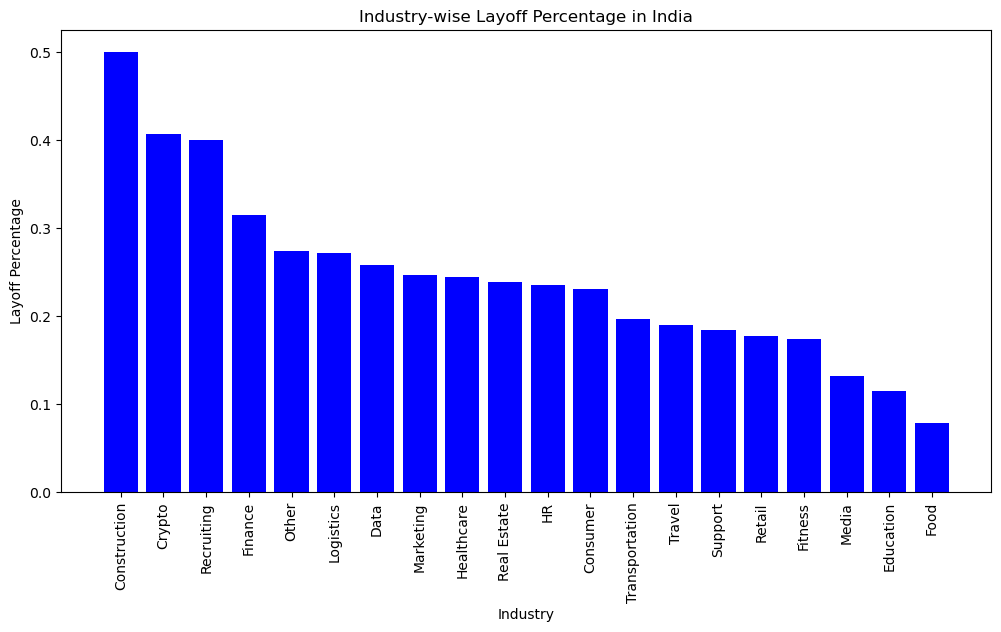

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = {
    'Industry': ['Construction', 'Crypto', 'Recruiting', 'Finance', 'Other',
                 'Logistics', 'Data', 'Marketing', 'Healthcare', 'Real Estate',
                 'HR', 'Consumer', 'Transportation', 'Travel', 'Support',
                 'Retail', 'Fitness', 'Media', 'Education', 'Food'],
    'Layoff Percentage': [0.500000, 0.407082, 0.400000, 0.314767, 0.273294,
                          0.271989, 0.257984, 0.246938, 0.244334, 0.238249,
                          0.235249, 0.230321, 0.196448, 0.189791, 0.184569,
                          0.177234, 0.174070, 0.131542, 0.114536, 0.078467]
}

industry_wise_layoff_percentage = pd.DataFrame(data)
industry_wise_layoff_percentage['Layoff Percentage'] = industry_wise_layoff_percentage['Layoff Percentage'].fillna(0) # Fill NaN values with 0

plt.figure(figsize=(12, 6))
plt.bar(industry_wise_layoff_percentage['Industry'], industry_wise_layoff_percentage['Layoff Percentage'], color='b')
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Layoff Percentage')
plt.title('Industry-wise Layoff Percentage in India')
plt.show()


# For Netherlands:

In [28]:
# finding employee and layoff count (industry wise) in Netherlands:

employee_count_by_industry_Netherlands = Netherlands_dataset.groupby('Industry')['employee_count'].sum()
laid_off_count_by_industry_Netherlands = Netherlands_dataset.groupby('Industry')['Laid_Off_Count'].sum()

In [29]:
# Sorting employee count (industry wise) for Netherlands in descending order:
employee_count_by_industry_Netherlands = employee_count_by_industry_Netherlands.sort_values(ascending=False)
employee_count_by_industry_Netherlands

Industry
Healthcare        1.261538e+07
Travel            1.750000e+06
Marketing         1.000000e+06
Transportation    5.900000e+05
Finance           4.519610e+05
Other             1.962374e+05
Food              1.495478e+05
Name: employee_count, dtype: float64

In [30]:
# Sorting layoff count (industry wise) for Netherlands in descending order:
laid_off_count_by_industry_Netherlands = laid_off_count_by_industry_Netherlands.sort_values(ascending=False)
laid_off_count_by_industry_Netherlands

Industry
Healthcare        10000.000000
Travel             4375.000000
Marketing          1500.000000
Transportation      725.000000
Finance             654.825175
Other               584.825175
Food                390.000000
Name: Laid_Off_Count, dtype: float64

In [31]:
# finding the layoff percentage for every industry in Netherlands and sorting it in descending order:
industry_wise_layoff_percentage_Netherlands = ((laid_off_count_by_industry_Netherlands)/(employee_count_by_industry_Netherlands))*100
industry_wise_layoff_percentage_Netherlands = industry_wise_layoff_percentage_Netherlands.sort_values(ascending=False)
industry_wise_layoff_percentage_Netherlands

Industry
Other             0.298019
Food              0.260786
Travel            0.250000
Marketing         0.150000
Finance           0.144885
Transportation    0.122881
Healthcare        0.079268
dtype: float64

# Creating a bar graph depicting the industry wise layoff percentage in Netherlands:

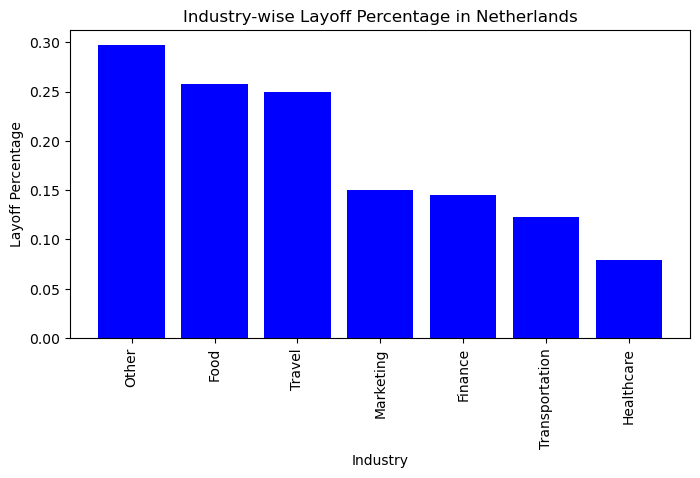

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Industry': ['Other', 'Food', 'Travel', 'Marketing', 'Finance', 'Transportation', 'Healthcare'],
    'Layoff Percentage': [0.297563, 0.257984, 0.250000, 0.150000, 0.144915, 0.122881, 0.079268]
}

industry_wise_layoff_percentage = pd.DataFrame(data)
industry_wise_layoff_percentage['Layoff Percentage'] = industry_wise_layoff_percentage['Layoff Percentage'].fillna(0) # Fill NaN values with 0

plt.figure(figsize=(8, 4))
plt.bar(industry_wise_layoff_percentage['Industry'], industry_wise_layoff_percentage['Layoff Percentage'], color='b')
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Layoff Percentage')
plt.title('Industry-wise Layoff Percentage in Netherlands')
plt.show()


# For United Kingdom:

In [33]:
# finding employee and layoff count (industry wise) in United Kingdom:

employee_count_by_industry_United_Kingdom = United_Kingdom_dataset.groupby('Industry')['employee_count'].sum()
laid_off_count_by_industry_United_Kingdom = United_Kingdom_dataset.groupby('Industry')['Laid_Off_Count'].sum()

In [34]:
# Sorting employee count (industry wise) for United Kingdom in descending order:
employee_count_by_industry_United_Kingdom = employee_count_by_industry_United_Kingdom.sort_values(ascending=False)
employee_count_by_industry_United_Kingdom

Industry
Food              1.814927e+06
Transportation    1.636962e+06
Finance           1.485066e+06
Other             7.494030e+05
HR                3.912475e+05
Crypto            3.901026e+05
Media             3.508124e+05
Travel            3.241952e+05
Consumer          2.611202e+05
Security          2.332381e+05
Data              2.012473e+05
Retail            9.811788e+04
Education         9.678908e+04
Energy            9.678908e+04
Real Estate       9.586396e+04
Marketing         9.024126e+04
Aerospace         5.305882e+04
Healthcare        3.934558e+04
Product           1.000000e+03
Name: employee_count, dtype: float64

In [35]:
# Sorting layoff count (industry wise) for United Kingdom in descending order:
laid_off_count_by_industry_United_Kingdom = laid_off_count_by_industry_United_Kingdom.sort_values(ascending=False)
laid_off_count_by_industry_United_Kingdom

Industry
Transportation    3682.650350
Food              3174.237762
Finance           2355.888112
Other             1251.650350
Crypto            1110.825175
Travel            1001.412587
Media              617.412587
HR                 532.825175
Data               524.825175
Aerospace          451.000000
Marketing          370.412587
Retail             332.412587
Energy             252.412587
Education          252.412587
Real Estate        250.000000
Security           183.000000
Healthcare         108.000000
Consumer            79.000000
Product             10.000000
Name: Laid_Off_Count, dtype: float64

In [36]:
# finding the layoff percentage for every industry in United Kingdom and sorting it in descending order:
industry_wise_layoff_percentage_United_Kingdom = ((laid_off_count_by_industry_United_Kingdom)/(employee_count_by_industry_United_Kingdom))*100
industry_wise_layoff_percentage_United_Kingdom = industry_wise_layoff_percentage_United_Kingdom.sort_values(ascending=False)
industry_wise_layoff_percentage_United_Kingdom

Industry
Product           1.000000
Aerospace         0.850000
Marketing         0.410469
Retail            0.338789
Travel            0.308892
Crypto            0.284752
Healthcare        0.274491
Data              0.260786
Real Estate       0.260786
Energy            0.260786
Education         0.260786
Transportation    0.224969
Media             0.175995
Food              0.174896
Other             0.167020
Finance           0.158639
HR                0.136186
Security          0.078461
Consumer          0.030254
dtype: float64

# Creating a bar graph depicting the industry wise layoff percentage in United Kingdom:

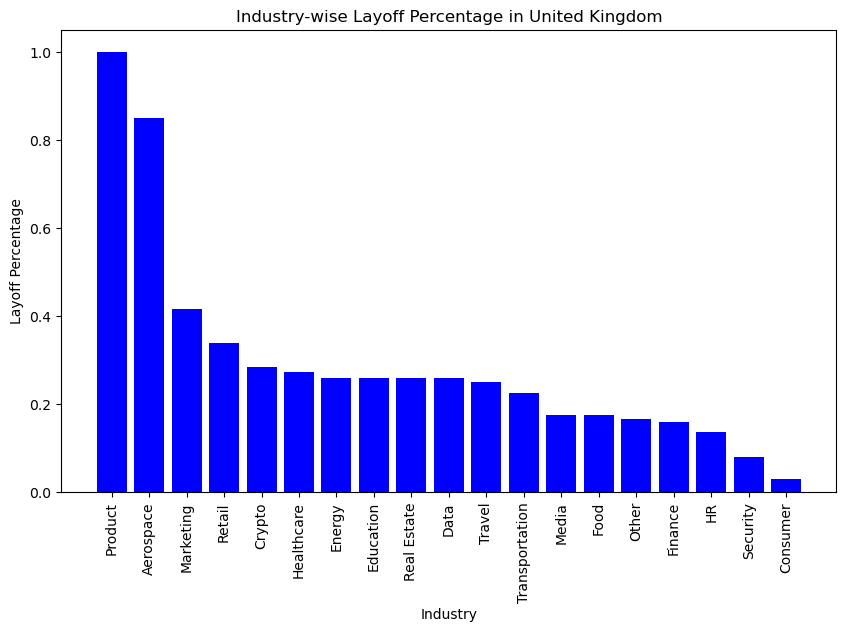

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Industry': ['Product', 'Aerospace', 'Marketing', 'Retail', 'Crypto', 'Healthcare', 'Energy', 'Education', 
                 'Real Estate', 'Data', 'Travel', 'Transportation', 'Media', 'Food', 'Other', 'Finance', 'HR', 
                 'Security', 'Consumer'],
    'Layoff Percentage': [1.000000, 0.850000, 0.415105, 0.338853, 0.284707, 0.271615, 0.257984, 0.257984, 
                          0.257984, 0.257984, 0.250018, 0.224581, 0.175608, 0.174044, 0.166679, 0.158490, 
                          0.135803, 0.078461, 0.030240]
}
industry_wise_layoff_percentage = pd.DataFrame(data)
industry_wise_layoff_percentage['Layoff Percentage'] = industry_wise_layoff_percentage['Layoff Percentage'].fillna(0) # Fill NaN values with 0

plt.figure(figsize=(10, 6))
plt.bar(industry_wise_layoff_percentage['Industry'], industry_wise_layoff_percentage['Layoff Percentage'], color='b')
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Layoff Percentage')
plt.title('Industry-wise Layoff Percentage in United Kingdom')
plt.show()


# For Brazil:

In [38]:
# finding employee and layoff count (industry wise) in Brazil:

employee_count_by_industry_Brazil = Brazil_dataset.groupby('Industry')['employee_count'].sum()
laid_off_count_by_industry_Brazil = Brazil_dataset.groupby('Industry')['Laid_Off_Count'].sum()

In [39]:
# Sorting employee count (industry wise) for Brazil in descending order:
employee_count_by_industry_Brazil = employee_count_by_industry_Brazil.sort_values(ascending=False)
employee_count_by_industry_Brazil

Industry
Finance           3.940762e+06
Real Estate       1.442659e+06
Retail            7.650247e+05
Logistics         7.619048e+05
Food              7.426936e+05
Transportation    6.056481e+05
Other             2.451220e+05
Marketing         2.391667e+05
Travel            2.314898e+05
Consumer          1.948346e+05
Healthcare        1.747827e+05
Crypto            1.416667e+05
Fitness           1.415152e+05
Education         8.740000e+04
Support           1.320000e+04
Sales             1.275000e+04
Recruiting        1.125000e+04
HR                3.834558e+03
Name: employee_count, dtype: float64

In [40]:
# Sorting layoff count (industry wise) for Brazil in descending order:
laid_off_count_by_industry_Brazil = laid_off_count_by_industry_Brazil.sort_values(ascending=False)
laid_off_count_by_industry_Brazil

Industry
Finance           5071.888112
Real Estate       1537.000000
Retail            1244.825175
Logistics          800.000000
Transportation     697.412587
Food               675.000000
Travel             667.000000
Fitness            467.000000
Consumer           381.000000
Marketing          327.000000
Healthcare         311.000000
Other              243.000000
Education          191.000000
Crypto             190.000000
Sales               51.000000
Support             33.000000
Recruiting          18.000000
HR                  10.000000
Name: Laid_Off_Count, dtype: float64

In [41]:
# finding the layoff percentage for every industry in Brazil and sorting it in descending order:
industry_wise_layoff_percentage_Brazil = ((laid_off_count_by_industry_Brazil)/(employee_count_by_industry_Brazil))*100
industry_wise_layoff_percentage_Brazil = industry_wise_layoff_percentage_Brazil.sort_values(ascending=False)
industry_wise_layoff_percentage_Brazil

Industry
Sales             0.400000
Fitness           0.330000
Travel            0.288134
HR                0.260786
Support           0.250000
Education         0.218535
Consumer          0.195551
Healthcare        0.177935
Retail            0.162717
Recruiting        0.160000
Marketing         0.136725
Crypto            0.134118
Finance           0.128703
Transportation    0.115151
Real Estate       0.106539
Logistics         0.105000
Other             0.099134
Food              0.090885
dtype: float64

# Creating a bar graph depicting the industry wise layoff percentage in Brazil:

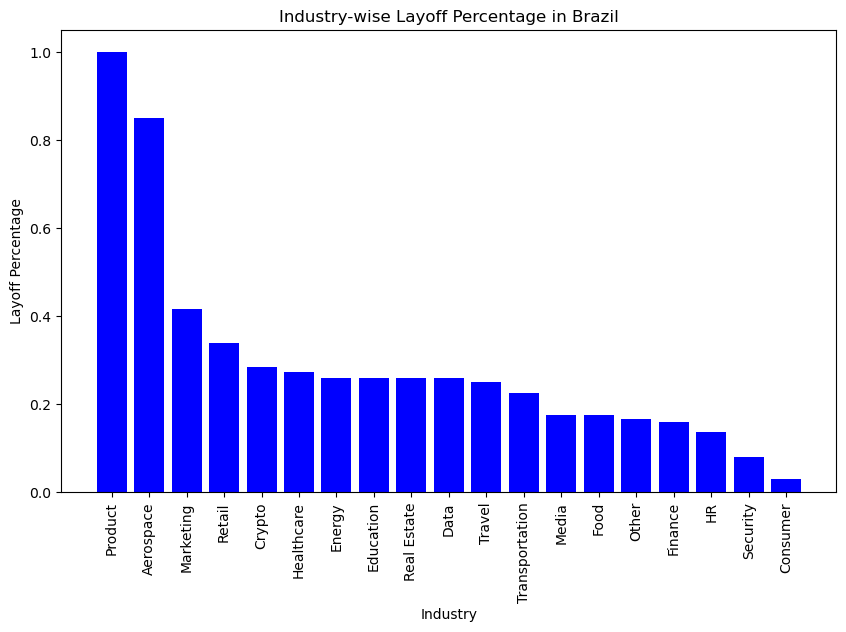

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Industry': ['Product', 'Aerospace', 'Marketing', 'Retail', 'Crypto', 'Healthcare', 'Energy', 'Education', 
                 'Real Estate', 'Data', 'Travel', 'Transportation', 'Media', 'Food', 'Other', 'Finance', 'HR', 
                 'Security', 'Consumer'],
    'Layoff Percentage': [1.000000, 0.850000, 0.415105, 0.338853, 0.284707, 0.271615, 0.257984, 0.257984, 
                          0.257984, 0.257984, 0.250018, 0.224581, 0.175608, 0.174044, 0.166679, 0.158490, 
                          0.135803, 0.078461, 0.030240]
}

industry_wise_layoff_percentage = pd.DataFrame(data)
industry_wise_layoff_percentage['Layoff Percentage'] = industry_wise_layoff_percentage['Layoff Percentage'].fillna(0) # Fill NaN values with 0

plt.figure(figsize=(10, 6))
plt.bar(industry_wise_layoff_percentage['Industry'], industry_wise_layoff_percentage['Layoff Percentage'], color='b')
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Layoff Percentage')
plt.title('Industry-wise Layoff Percentage in Brazil')
plt.show()


# Since we have performed analysis on the basis of industry in the worstly affected countries, now we'll be analyzing the data based on the location headquarters for companies belonging to the worstly affected countries.For this, we'll be grouping data on basis of location headquarters and see the employee count and layoff count there to calculate layoff percentage to find out what effect does deciding the headquarter location have on layoffs:

# For USA:

In [43]:
# finding employee and layoff count (headquarter location wise) in USA:

employee_count_by_location_USA = USA_dataset.groupby('Location_HQ')['employee_count'].sum()
laid_off_count_by_location_USA = USA_dataset.groupby('Location_HQ')['Laid_Off_Count'].sum()

In [44]:
# Sorting employee count (headquarter location wise) for USA based companies in descending order:
employee_count_by_location_USA = employee_count_by_location_USA.sort_values(ascending=False)
employee_count_by_location_USA

Location_HQ
SF Bay Area      1.710964e+08
Seattle          1.092678e+08
New York City    4.535372e+07
Austin           1.905707e+07
Boston           1.331523e+07
                     ...     
Orlando          9.202940e+03
New Delhi        4.984926e+03
Indianapolis     3.333333e+03
Toronto          2.000000e+03
Los Angeles               NaN
Name: employee_count, Length: 97, dtype: float64

In [45]:
# Sorting layoff count (headquarter location wise) for USA based companies in descending order:
laid_off_count_by_location_USA = laid_off_count_by_location_USA.sort_values(ascending=False)
laid_off_count_by_location_USA

Location_HQ
SF Bay Area      191433.804196
Seattle           52447.615385
New York City     49913.419580
Boston            21302.090909
Los Angeles       16256.678322
                     ...      
Orlando              24.000000
Kansas City          20.000000
New Delhi            13.000000
Indianapolis          5.000000
Toronto               5.000000
Name: Laid_Off_Count, Length: 97, dtype: float64

In [46]:
# finding the layoff percentage for every headquarter location for USA based companies and sorting it in descending order:
location_wise_layoff_percentage_USA = ((laid_off_count_by_location_USA)/(employee_count_by_location_USA))*100
location_wise_layoff_percentage_USA = location_wise_layoff_percentage_USA.sort_values(ascending=False)
location_wise_layoff_percentage_USA

Location_HQ
Brisbane        1.000000
Selangor        1.000000
Fayetteville    1.000000
Chennai         1.000000
Spokane         0.622708
                  ...   
Boise           0.078102
St. Louis       0.070046
Seattle         0.047999
Kansas City     0.020000
Los Angeles          NaN
Length: 97, dtype: float64

# Creating line graph depicting the headquarter location wise layoff percentage for USA based companies.Since we have too many locations, in order to properly visualize the data, we'll be plotting the bar graph for top 10 and bottom 10 locations according to layoff percentage:

In [47]:
# extracting top 10 locations in a separate dataset:
location_wise_layoff_percentage_USA_top_10 = location_wise_layoff_percentage_USA[:10]
location_wise_layoff_percentage_USA_top_10

Location_HQ
Brisbane        1.000000
Selangor        1.000000
Fayetteville    1.000000
Chennai         1.000000
Spokane         0.622708
Nashville       0.605553
Grand Rapids    0.427527
Mexico City     0.411504
Tokyo           0.400000
Tampa Bay       0.400000
dtype: float64

In [48]:
# extracting bottom 10 locations in a separate dataset:
location_wise_layoff_percentage_USA_bottom_10 = location_wise_layoff_percentage_USA[86:]
location_wise_layoff_percentage_USA_bottom_10

Location_HQ
Dubai           0.100000
Oxford          0.100000
Philadelphia    0.088869
Baltimore       0.083008
Detroit         0.080493
Austin          0.079958
Boise           0.078102
St. Louis       0.070046
Seattle         0.047999
Kansas City     0.020000
Los Angeles          NaN
dtype: float64

# Creating a line graph for the 10 worstly affected headquarter locations:

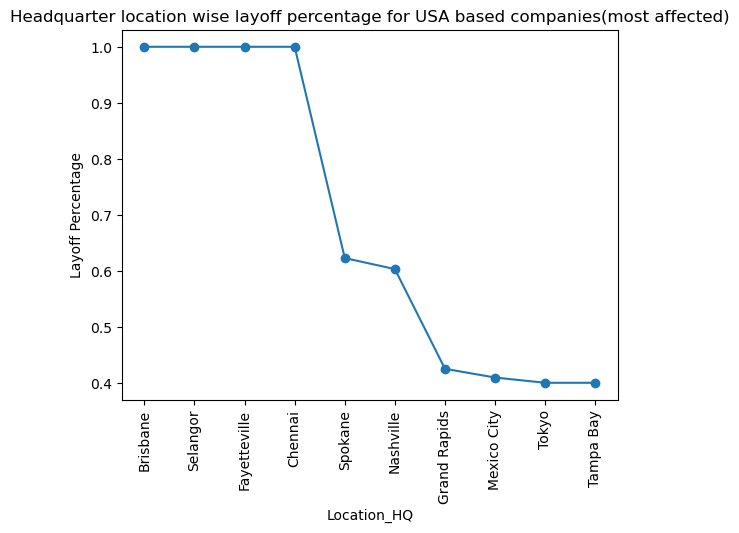

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {'Location_HQ': ['Brisbane', 'Selangor', 'Fayetteville', 'Chennai', 'Spokane', 'Nashville', 'Grand Rapids', 'Mexico City', 'Tokyo', 'Tampa Bay'], 
        'Layoff_Percentage': [1.0, 1.0, 1.0, 1.0, 0.622708, 0.603039, 0.424973, 0.409368, 0.4, 0.4]}

# Convert the data to a DataFrame
location_wise_layoff_percentage = pd.DataFrame(data)

# Fill NaN values with 0
location_wise_layoff_percentage.fillna(0, inplace=True)

# Create the line graph
plt.plot(location_wise_layoff_percentage['Location_HQ'], location_wise_layoff_percentage['Layoff_Percentage'], marker='o')

# Set the title and axis labels
plt.title('Headquarter location wise layoff percentage for USA based companies(most affected)')
plt.xlabel('Location_HQ')
plt.ylabel('Layoff Percentage')

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Show the graph
plt.show()


# Creating a line graph for the 10 least affected headquarter locations:

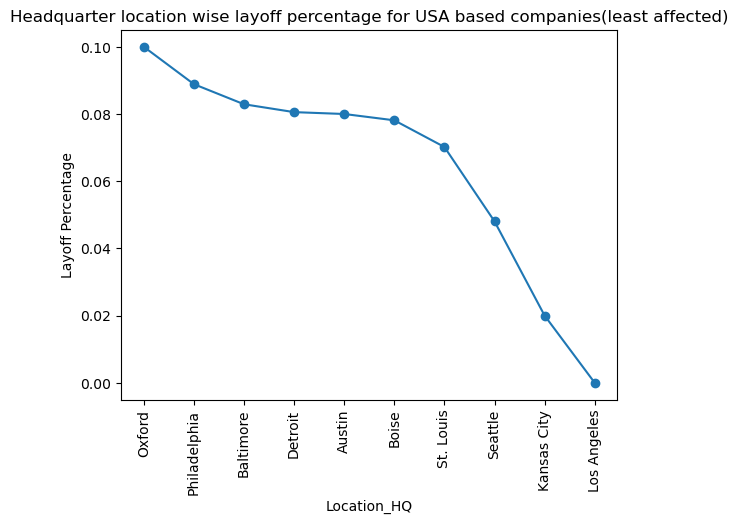

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {'Location_HQ': ['Oxford', 'Philadelphia', 'Baltimore', 'Detroit', 'Austin', 'Boise', 'St. Louis', 'Seattle', 'Kansas City', 'Los Angeles'], 
        'Layoff_Percentage': [0.1, 0.088874, 0.082895, 0.080551, 0.079997, 0.078117, 0.070178, 0.048049, 0.02, 0]}

# Convert the data to a DataFrame
location_wise_layoff_percentage = pd.DataFrame(data)

# Fill NaN values with 0
location_wise_layoff_percentage.fillna(0, inplace=True)

# Create the line graph
plt.plot(location_wise_layoff_percentage['Location_HQ'], location_wise_layoff_percentage['Layoff_Percentage'], marker='o')

# Set the title and axis labels
plt.title('Headquarter location wise layoff percentage for USA based companies(least affected)')
plt.xlabel('Location_HQ')
plt.ylabel('Layoff Percentage')

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Show the graph
plt.show()

# For India:

In [51]:
# finding employee and layoff count (headquarter location wise) in India:

employee_count_by_location_India = India_dataset.groupby('Location_HQ')['employee_count'].sum()
laid_off_count_by_location_India = India_dataset.groupby('Location_HQ')['Laid_Off_Count'].sum()

In [52]:
# Sorting employee count (headquarter location wise) for Indian based companies in descending order:
employee_count_by_location_India = employee_count_by_location_India.sort_values(ascending=False)
employee_count_by_location_India

Location_HQ
Bengaluru    2.015021e+07
Mumbai       3.893096e+06
Gurugram     3.795030e+06
New Delhi    1.205180e+06
Patna        5.048252e+05
Noida        1.211052e+05
Ahmedabad    1.000000e+05
Hyderabad    9.678908e+04
Chennai      4.666667e+04
Indore       2.875919e+04
Pune         2.727273e+04
Name: employee_count, dtype: float64

In [53]:
# Sorting layoff count (headquarter location wise) for Indian based companies in descending order:
laid_off_count_by_location_India = laid_off_count_by_location_India.sort_values(ascending=False)
laid_off_count_by_location_India

Location_HQ
Bengaluru    25962.776224
Gurugram      7638.062937
Mumbai        6924.650350
New Delhi     2162.412587
Noida          502.412587
Ahmedabad      500.000000
Hyderabad      252.412587
Patna          252.412587
Chennai        150.000000
Indore          75.000000
Pune            30.000000
Name: Laid_Off_Count, dtype: float64

In [54]:
# finding the layoff percentage for every headquarter location for Indian based companies and sorting it in descending order:
location_wise_layoff_percentage_India = ((laid_off_count_by_location_India)/(employee_count_by_location_India))*100
location_wise_layoff_percentage_India = location_wise_layoff_percentage_India.sort_values(ascending=False)
location_wise_layoff_percentage_India

Location_HQ
Ahmedabad    0.500000
Noida        0.414856
Chennai      0.321429
Hyderabad    0.260786
Indore       0.260786
Gurugram     0.201265
New Delhi    0.179426
Mumbai       0.177870
Bengaluru    0.128846
Pune         0.110000
Patna        0.050000
dtype: float64

# Creating line graph depicting the headquarter location wise layoff percentage for Indian based companies:

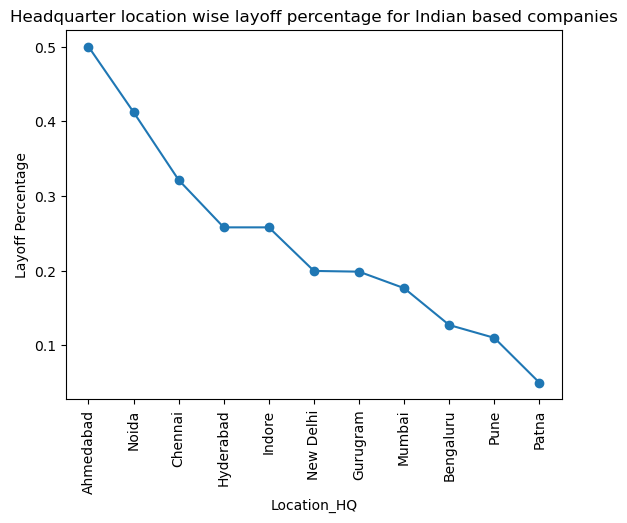

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {'Location_HQ': ['Ahmedabad', 'Noida', 'Chennai', 'Hyderabad', 'Indore', 'New Delhi', 'Gurugram', 'Mumbai', 'Bengaluru', 'Pune', 'Patna'], 
        'Layoff_Percentage': [0.5, 0.412275, 0.321429, 0.257984, 0.257984, 0.199639, 0.198658, 0.176558, 0.127207, 0.11, 0.05]}

# Convert the data to a DataFrame
location_wise_layoff_percentage = pd.DataFrame(data)

# Fill NaN values with 0
location_wise_layoff_percentage.fillna(0, inplace=True)

# Create the line graph
plt.plot(location_wise_layoff_percentage['Location_HQ'], location_wise_layoff_percentage['Layoff_Percentage'], marker='o')

# Set the title and axis labels
plt.title('Headquarter location wise layoff percentage for Indian based companies')
plt.xlabel('Location_HQ')
plt.ylabel('Layoff Percentage')

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Show the graph
plt.show()


# For Netherlands:

In [56]:
# finding employee and layoff count (headquarter location wise) in Netherlands:

employee_count_by_location_Netherlands = Netherlands_dataset.groupby('Location_HQ')['employee_count'].sum()
laid_off_count_by_location_Netherlands = Netherlands_dataset.groupby('Location_HQ')['Laid_Off_Count'].sum()

In [57]:
# Sorting employee count (headquarter location wise) for Netherland based companies in descending order:
employee_count_by_location_Netherlands = employee_count_by_location_Netherlands.sort_values(ascending=False)
employee_count_by_location_Netherlands

Location_HQ
Amsterdam    1.672245e+07
The Hague    3.067647e+04
Name: employee_count, dtype: float64

In [58]:
# Sorting layoff count (headquarter location wise) for Netherland based companies in descending order:
laid_off_count_by_location_Netherlands = laid_off_count_by_location_Netherlands.sort_values(ascending=False)
laid_off_count_by_location_Netherlands

Location_HQ
Amsterdam    18149.65035
The Hague       80.00000
Name: Laid_Off_Count, dtype: float64

In [59]:
# finding the layoff percentage for every headquarter location for Netherland based companies and sorting it in descending order:
location_wise_layoff_percentage_Netherlands = ((laid_off_count_by_location_Netherlands)/(employee_count_by_location_Netherlands))*100
location_wise_layoff_percentage_Netherlands = location_wise_layoff_percentage_Netherlands.sort_values(ascending=False)
location_wise_layoff_percentage_Netherlands

Location_HQ
The Hague    0.260786
Amsterdam    0.108535
dtype: float64

# Creating line graph depicting the headquarter location wise layoff percentage for Netherland based companies:

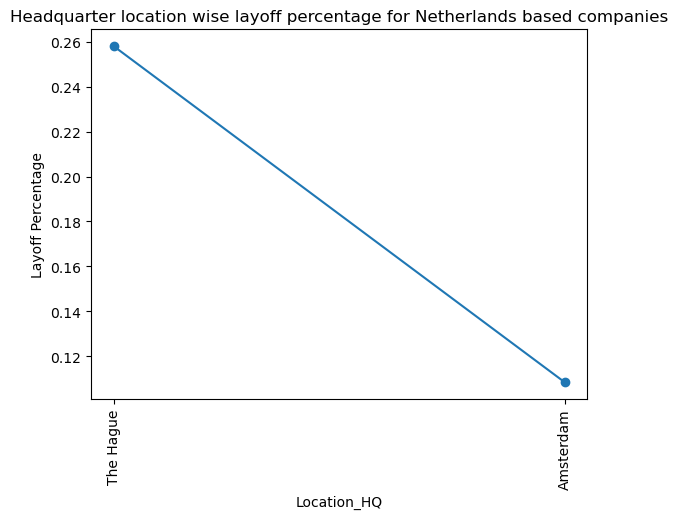

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {'Location_HQ': ['The Hague', 'Amsterdam'], 
        'Layoff_Percentage': [0.257984, 0.108546]}

# Convert the data to a DataFrame
location_wise_layoff_percentage = pd.DataFrame(data)

# Fill NaN values with 0
location_wise_layoff_percentage.fillna(0, inplace=True)

# Create the line graph
plt.plot(location_wise_layoff_percentage['Location_HQ'], location_wise_layoff_percentage['Layoff_Percentage'], marker='o')

# Set the title and axis labels
plt.title('Headquarter location wise layoff percentage for Netherlands based companies')
plt.xlabel('Location_HQ')
plt.ylabel('Layoff Percentage')

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Show the graph
plt.show()


# For United Kingdom:

In [61]:
# finding employee and layoff count (headquarter location wise) in United Kingdom:

employee_count_by_location_United_Kingdom = United_Kingdom_dataset.groupby('Location_HQ')['employee_count'].sum()
laid_off_count_by_location_United_Kingdom = United_Kingdom_dataset.groupby('Location_HQ')['Laid_Off_Count'].sum()

In [62]:
# Sorting employee count (headquarter location wise) for United Kingdom based companies in descending order:
employee_count_by_location_United_Kingdom = employee_count_by_location_United_Kingdom.sort_values(ascending=False)
employee_count_by_location_United_Kingdom

Location_HQ
London        7.921166e+06
Manchester    1.785714e+05
Edinburgh     1.500000e+05
Bristol       1.347891e+05
Chester       2.500000e+04
Name: employee_count, dtype: float64

In [63]:
# Sorting layoff count (headquarter location wise) for United Kingdom based companies in descending order:
laid_off_count_by_location_United_Kingdom = laid_off_count_by_location_United_Kingdom.sort_values(ascending=False)
laid_off_count_by_location_United_Kingdom

Location_HQ
London        15784.965035
Edinburgh       300.000000
Bristol         290.412587
Manchester      125.000000
Chester          40.000000
Name: Laid_Off_Count, dtype: float64

In [64]:
# finding the layoff percentage for every headquarter location for United Kingdom based companies and sorting it in descending order:
location_wise_layoff_percentage_United_Kingdom = ((laid_off_count_by_location_United_Kingdom)/(employee_count_by_location_United_Kingdom))*100
location_wise_layoff_percentage_United_Kingdom = location_wise_layoff_percentage_United_Kingdom.sort_values(ascending=False)
location_wise_layoff_percentage_United_Kingdom

Location_HQ
Bristol       0.215457
Edinburgh     0.200000
London        0.199276
Chester       0.160000
Manchester    0.070000
dtype: float64

# Creating line graph depicting the headquarter location wise layoff percentage for United Kingdom based companies:

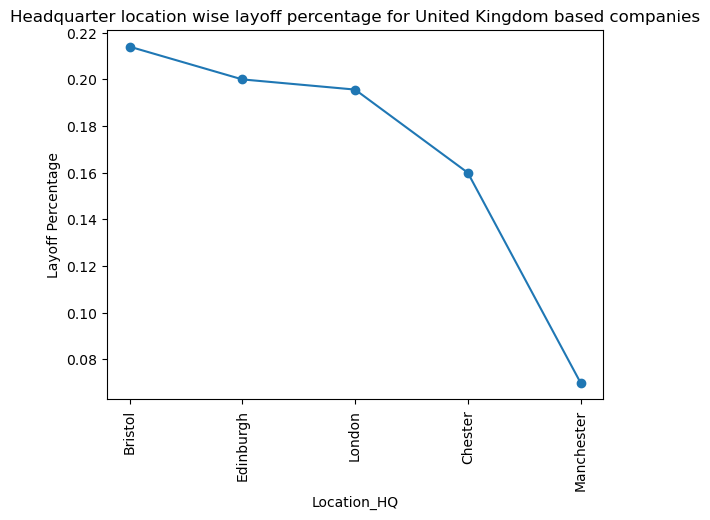

In [65]:
import matplotlib.pyplot as plt

# Define the data
data = {'Location_HQ': ['Bristol', 'Edinburgh', 'London', 'Chester', 'Manchester'], 
        'Layoff_Percentage': [0.214039, 0.2, 0.195638, 0.16, 0.07]}

# Convert the data to a DataFrame
location_wise_layoff_percentage = pd.DataFrame(data)

# Fill NaN values with 0
location_wise_layoff_percentage.fillna(0, inplace=True)

# Create the line graph
plt.plot(location_wise_layoff_percentage['Location_HQ'], location_wise_layoff_percentage['Layoff_Percentage'], marker='o')

# Set the title and axis labels
plt.title('Headquarter location wise layoff percentage for United Kingdom based companies')
plt.xlabel('Location_HQ')
plt.ylabel('Layoff Percentage')

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Show the graph
plt.show()

# For Brazil:

In [66]:
# finding employee and layoff count (headquarter location wise) in Brazil:

employee_count_by_location_Brazil = Brazil_dataset.groupby('Location_HQ')['employee_count'].sum()
laid_off_count_by_location_Brazil = Brazil_dataset.groupby('Location_HQ')['Laid_Off_Count'].sum()

In [67]:
# Sorting employee count (headquarter location wise) for United Kingdom based companies in descending order:
employee_count_by_location_Brazil = employee_count_by_location_Brazil.sort_values(ascending=False)
employee_count_by_location_Brazil

Location_HQ
Sao Paulo         8.565723e+06
Curitiba          7.378672e+05
Belo Horizonte    2.789286e+05
Joinville         5.275000e+04
Florianópolis     3.888889e+04
Blumenau          3.237279e+04
Brasilia          3.000000e+04
Porto Alegre      1.917279e+04
Name: employee_count, dtype: float64

In [68]:
# Sorting layoff count (headquarter location wise) for Brazil based companies in descending order:
laid_off_count_by_location_Brazil = laid_off_count_by_location_Brazil.sort_values(ascending=False)
laid_off_count_by_location_Brazil

Location_HQ
Sao Paulo         10747.888112
Curitiba           1219.237762
Belo Horizonte      494.000000
Joinville           191.000000
Blumenau             83.000000
Florianópolis        70.000000
Brasilia             60.000000
Porto Alegre         50.000000
Name: Laid_Off_Count, dtype: float64

In [69]:
# finding the layoff percentage for every headquarter location for Brazil based companies and sorting it in descending order:
location_wise_layoff_percentage_Brazil = ((laid_off_count_by_location_Brazil)/(employee_count_by_location_Brazil))*100
location_wise_layoff_percentage_Brazil = location_wise_layoff_percentage_Brazil.sort_values(ascending=False)
location_wise_layoff_percentage_Brazil

Location_HQ
Joinville         0.362085
Porto Alegre      0.260786
Blumenau          0.256388
Brasilia          0.200000
Florianópolis     0.180000
Belo Horizonte    0.177106
Curitiba          0.165238
Sao Paulo         0.125476
dtype: float64

# Creating line graph depicting the headquarter location wise layoff percentage for Brazil based companies:

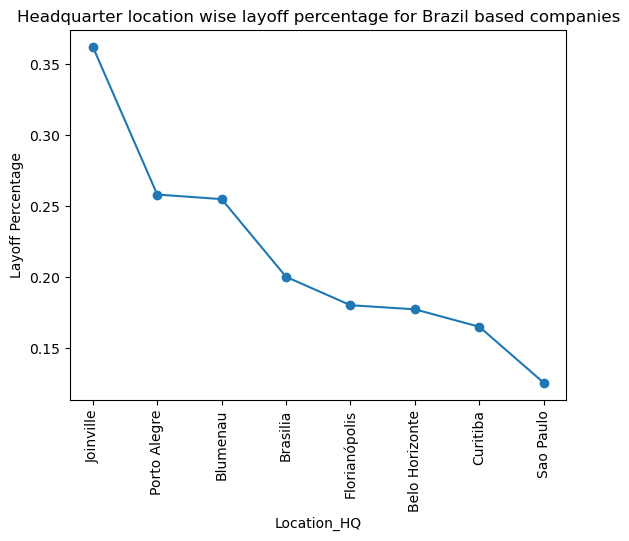

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {'Location_HQ': ['Joinville', 'Porto Alegre', 'Blumenau', 'Brasilia', 'Florianópolis', 'Belo Horizonte', 'Curitiba', 'Sao Paulo'], 
        'Layoff_Percentage': [0.362085, 0.257984, 0.254749, 0.2, 0.18, 0.177106, 0.164825, 0.125348]}

# Convert the data to a DataFrame and rename it
location_wise_layoff_percentage = pd.DataFrame(data)

# Fill NaN values with 0
location_wise_layoff_percentage.fillna(0, inplace=True)

# Create the line graph
plt.plot(location_wise_layoff_percentage['Location_HQ'], location_wise_layoff_percentage['Layoff_Percentage'], marker='o')

# Set the title and axis labels
plt.title('Headquarter location wise layoff percentage for Brazil based companies')
plt.xlabel('Location_HQ')
plt.ylabel('Layoff Percentage')

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Show the graph
plt.show()


# Now we'll be seeing which companies have benefitted from layoffs.We have got a column in our dataset which talks about the funds raised by a company by laying off employees.Secondly,we can calculate the percentage of employees every company had laid off in order to raise those funds(we already have this information in the original dataset).Based on these 2 things,we can find which companies benefitted the most and which companies benefitted the least:

In [95]:
# First we create a benefit column and store the information in a separate dataset containing all other info of original dataset also.

dataset_copy_2 = dataset_copy
dataset_copy_2['Benefit'] = dataset['Funds_Raised']/dataset['Percentage']
dataset_copy_2.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,employee_count,Benefit
0,Opendoor,SF Bay Area,Real Estate,560.000000,0.22,2023-04-18,1900.000000,Post-IPO,United States,254545.454545,8636.363636
1,Culture Amp,Melbourne,HR,252.412587,0.09,2023-04-18,257.000000,Series F,Australia,280458.430458,2855.555556
2,Noon,Riyadh,Retail,252.412587,0.10,2023-04-18,817.879266,Unknown,Saudi Arabia,252412.587413,8178.792658
3,Ten Square Games,Wrocław,Consumer,120.000000,0.25,2023-04-17,817.879266,Seed,Poland,48000.000000,3271.517063
4,Ynsect,Paris,Food,17.000000,0.25,2023-04-17,579.000000,Series D,France,6800.000000,2316.000000


In [96]:
# The columns of use from the dataset we just created are Company & Benefit because we have to find out the benefit for
# every company,so we extract the useful columns and store it in separate dataframe.

company_benefit = dataset_copy_2.loc[:,['Company','Benefit']]
company_benefit

,Company,Benefit
0,Opendoor,8636.363636
1,Culture Amp,2855.555556
2,Noon,8178.792658
3,Ten Square Games,3271.517063
4,Ynsect,2316.000000
...,...,...
2503,HopSkipDrive,450.000000
2504,Panda Squad,1.333333
2505,Tamara Mellon,225.000000
2506,EasyPost,46.014700


In [97]:
# In the dataset we have multiple instances of same company becuse there is a date column which indicates the percentage of
# employees laid off on a particular date in that company.So the benefit of the company across different dates will be
# different.To find the benefit of the companies we'll have to find the average of all these benefits.

average_benefit_by_company = company_benefit.groupby('Company')['Benefit'].mean()
print(average_benefit_by_company)

Company
 E Inc.              3136.205722
 Included Health     4533.333333
#Paid                 123.529412
&Open                 388.888889
100 Thieves           460.146995
                        ...     
iRobot                364.285714
kununu               3136.205722
nCino               15714.285714
tZero                1809.911515
uShip                 186.486486
Name: Benefit, Length: 1998, dtype: float64


In [98]:
# Finally to find out which company profited the most we'll have to sort the average_benefit_by_company dataset in descending
# order

average_benefit_by_company = average_benefit_by_company.sort_values(ascending=False)
average_benefit_by_company

Company
TaskUs                    inf
Netflix          4.297050e+06
Tesla            2.020000e+05
Grab             1.980000e+05
Rivian           1.705556e+05
                     ...     
Drip             0.000000e+00
Tuft & Needle    0.000000e+00
Chessable        0.000000e+00
SuperLearn       0.000000e+00
BitMEX           0.000000e+00
Name: Benefit, Length: 1998, dtype: float64

# Let's represent the profit of the top five most profitable companies on a bar graph:

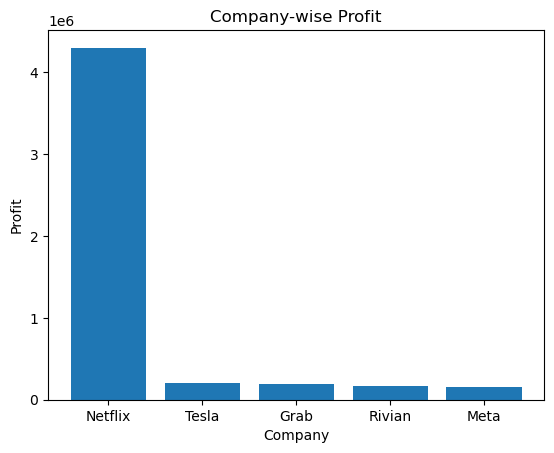

In [99]:
import matplotlib.pyplot as plt

# Data
companies = ['Netflix', 'Tesla', 'Grab', 'Rivian', 'Meta']
profits = [4299588, 202000, 198000, 170556, 150390]

# Bar graph
plt.bar(companies, profits)

# X-axis label
plt.xlabel('Company')

# Y-axis label
plt.ylabel('Profit')

# Title
plt.title('Company-wise Profit')

# Show the plot
plt.show()

# We see that Netflix has benefitted significantly from layoffs compared to the other four companies.So,let's create a heatmap in order to understand the benefit of Netflix across different days:

<AxesSubplot:xlabel='Date', ylabel='Location_HQ'>

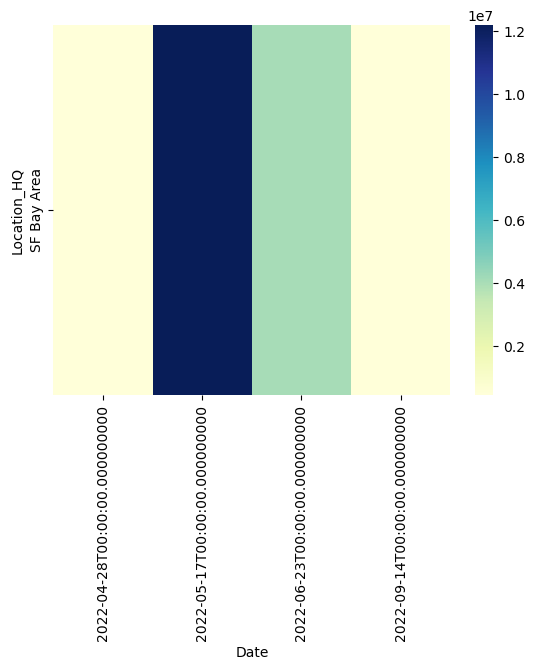

In [100]:
import pandas as pd
import seaborn as sns

# Filter the dataset for Netflix
netflix_df = dataset_copy_2[dataset_copy_2['Company'] == 'Netflix']

# Pivot the dataframe
netflix_pivot = netflix_df.pivot(index='Location_HQ', columns='Date', values='Benefit')

# Create the heatmap
sns.heatmap(netflix_pivot, cmap='YlGnBu')


In [101]:
print(dataset_copy_2[dataset_copy_2['Company']=='Netflix'])


      Company  Location_HQ Industry  Laid_Off_Count  Percentage       Date  \
1123  Netflix  SF Bay Area    Media            30.0    0.260786 2022-09-14   
1543  Netflix  SF Bay Area    Media           300.0    0.030000 2022-06-23   
1732  Netflix  SF Bay Area    Media           150.0    0.010000 2022-05-17   
1768  Netflix  SF Bay Area    Media            25.0    0.260786 2022-04-28   

      Funds_Raised     Stage        Country  employee_count       Benefit  
1123      121900.0  Post-IPO  United States    1.150367e+04  4.674327e+05  
1543      121900.0  Post-IPO  United States    1.000000e+06  4.063333e+06  
1732      121900.0  Post-IPO  United States    1.500000e+06  1.219000e+07  
1768      121900.0  Post-IPO  United States    9.586396e+03  4.674327e+05  


# Extracting the overall results obtained by analysis in separate csv's:

In [102]:
industry_wise_layoff_percentage_USA_top_five = industry_wise_layoff_percentage_USA[:5]
industry_wise_layoff_percentage_USA_top_five

Industry
Energy           0.261881
Travel           0.244554
Aerospace        0.232548
Education        0.225130
Manufacturing    0.213472
dtype: float64

In [103]:
file_path = r'Files\USA_industry_wise_layoff_percentage_top_five.csv'
industry_wise_layoff_percentage_USA_top_five.to_csv(file_path,index=True)

In [104]:
industry_wise_layoff_percentage_USA_bottom_five = industry_wise_layoff_percentage_USA[25:]
industry_wise_layoff_percentage_USA_bottom_five

Industry
Logistics    0.081276
Retail       0.057555
Sales        0.052066
Hardware     0.050271
Support      0.000000
dtype: float64

In [105]:
industry_wise_layoff_percentage_USA_bottom_five['Support'] = 0
industry_wise_layoff_percentage_USA_bottom_five

Industry
Logistics    0.081276
Retail       0.057555
Sales        0.052066
Hardware     0.050271
Support      0.000000
dtype: float64

In [106]:
file_path = r'Files\USA_industry_wise_layoff_percentage_bottom_five.csv'
industry_wise_layoff_percentage_USA_bottom_five.to_csv(file_path,index=True)

In [107]:
location_wise_layoff_percentage_USA_top_five = location_wise_layoff_percentage_USA[:5]
location_wise_layoff_percentage_USA_top_five

Location_HQ
Brisbane        1.000000
Selangor        1.000000
Fayetteville    1.000000
Chennai         1.000000
Spokane         0.622708
dtype: float64

In [108]:
file_path = r'Files\USA_location_wise_layoff_percentage_top_five.csv'
location_wise_layoff_percentage_USA_top_five.to_csv(file_path,index=True)

In [109]:
len(location_wise_layoff_percentage_USA)

97

In [110]:
location_wise_layoff_percentage_USA_bottom_five = location_wise_layoff_percentage_USA[91:]
location_wise_layoff_percentage_USA_bottom_five

Location_HQ
Austin         0.079958
Boise          0.078102
St. Louis      0.070046
Seattle        0.047999
Kansas City    0.020000
Los Angeles    0.000000
dtype: float64

In [111]:
location_wise_layoff_percentage_USA_bottom_five['Los Angeles'] = 0
location_wise_layoff_percentage_USA_bottom_five

Location_HQ
Austin         0.079958
Boise          0.078102
St. Louis      0.070046
Seattle        0.047999
Kansas City    0.020000
Los Angeles    0.000000
dtype: float64

In [112]:
file_path = r'Files\USA_location_wise_layoff_percentage_bottom_five.csv'
location_wise_layoff_percentage_USA_bottom_five.to_csv(file_path,index=True)

In [113]:
industry_wise_layoff_percentage_India

Industry
Construction      0.500000
Crypto            0.407229
Recruiting        0.400000
Finance           0.311052
Other             0.275174
Logistics         0.273951
Data              0.260786
Marketing         0.248602
Healthcare        0.244786
Real Estate       0.239950
HR                0.236796
Consumer          0.231813
Travel            0.190660
Media             0.190245
Transportation    0.188636
Support           0.185206
Retail            0.178040
Fitness           0.174380
Education         0.116160
Food              0.078668
dtype: float64

In [114]:
industry_wise_layoff_percentage_India_top_five = industry_wise_layoff_percentage_India[:5]
industry_wise_layoff_percentage_India_top_five

Industry
Construction    0.500000
Crypto          0.407229
Recruiting      0.400000
Finance         0.311052
Other           0.275174
dtype: float64

In [115]:
file_path = r'files\India_industry_wise_layoff_percentage_top_five.csv'
industry_wise_layoff_percentage_India_top_five.to_csv(file_path,index=True)

In [116]:
len(industry_wise_layoff_percentage_India)

20

In [117]:
industry_wise_layoff_percentage_India_bottom_five = industry_wise_layoff_percentage_India[15:]
industry_wise_layoff_percentage_India_bottom_five

Industry
Support      0.185206
Retail       0.178040
Fitness      0.174380
Education    0.116160
Food         0.078668
dtype: float64

In [118]:
file_path = r'Files\India_industry_wise_layoff_percentage_bottom_five.csv'
industry_wise_layoff_percentage_India_bottom_five.to_csv(file_path,index=True)

In [119]:
location_wise_layoff_percentage_India

Location_HQ
Ahmedabad    0.500000
Noida        0.414856
Chennai      0.321429
Hyderabad    0.260786
Indore       0.260786
Gurugram     0.201265
New Delhi    0.179426
Mumbai       0.177870
Bengaluru    0.128846
Pune         0.110000
Patna        0.050000
dtype: float64

In [120]:
location_wise_layoff_percentage_India_top_five = location_wise_layoff_percentage_India[:5]
location_wise_layoff_percentage_India_top_five

Location_HQ
Ahmedabad    0.500000
Noida        0.414856
Chennai      0.321429
Hyderabad    0.260786
Indore       0.260786
dtype: float64

In [121]:
file_path = r'Files\India_location_wise_layoff_percentage_top_five.csv'
location_wise_layoff_percentage_India_top_five.to_csv(file_path,index=True)

In [122]:
location_wise_layoff_percentage_India_bottom_five = location_wise_layoff_percentage_India[6:]
location_wise_layoff_percentage_India_bottom_five

Location_HQ
New Delhi    0.179426
Mumbai       0.177870
Bengaluru    0.128846
Pune         0.110000
Patna        0.050000
dtype: float64

In [123]:
file_path = r'Files\India_location_wise_layoff_percentage_bottom_five.csv'
location_wise_layoff_percentage_India_bottom_five.to_csv(file_path,index=True)

In [124]:
industry_wise_layoff_percentage_Netherlands

Industry
Other             0.298019
Food              0.260786
Travel            0.250000
Marketing         0.150000
Finance           0.144885
Transportation    0.122881
Healthcare        0.079268
dtype: float64

In [125]:
industry_wise_layoff_percentage_Netherlands_top_three = industry_wise_layoff_percentage_Netherlands[:3]
industry_wise_layoff_percentage_Netherlands_top_three

Industry
Other     0.298019
Food      0.260786
Travel    0.250000
dtype: float64

In [126]:
file_path = r'Files\Netherlands_industry_wise_layoff_percentage_top_three.csv'
industry_wise_layoff_percentage_Netherlands_top_three.to_csv(file_path,index=True)

In [127]:
industry_wise_layoff_percentage_Netherlands_bottom_three = industry_wise_layoff_percentage_Netherlands[4:]
industry_wise_layoff_percentage_Netherlands_bottom_three

Industry
Finance           0.144885
Transportation    0.122881
Healthcare        0.079268
dtype: float64

In [128]:
file_path = r'Files\Netherlands_industry_wise_layoff_percentage_bottom_three.csv'
industry_wise_layoff_percentage_Netherlands_bottom_three.to_csv(file_path,index=True)

In [129]:
location_wise_layoff_percentage_Netherlands

Location_HQ
The Hague    0.260786
Amsterdam    0.108535
dtype: float64

In [130]:
file_path = r'Files\Netherlands_location_wise_layoff_percentage.csv'
location_wise_layoff_percentage_Netherlands.to_csv(file_path,index=True)

In [131]:
industry_wise_layoff_percentage_United_Kingdom

Industry
Product           1.000000
Aerospace         0.850000
Marketing         0.410469
Retail            0.338789
Travel            0.308892
Crypto            0.284752
Healthcare        0.274491
Data              0.260786
Real Estate       0.260786
Energy            0.260786
Education         0.260786
Transportation    0.224969
Media             0.175995
Food              0.174896
Other             0.167020
Finance           0.158639
HR                0.136186
Security          0.078461
Consumer          0.030254
dtype: float64

In [132]:
industry_wise_layoff_percentage_United_Kingdom_top_five = industry_wise_layoff_percentage_United_Kingdom[:5]
industry_wise_layoff_percentage_United_Kingdom_top_five

Industry
Product      1.000000
Aerospace    0.850000
Marketing    0.410469
Retail       0.338789
Travel       0.308892
dtype: float64

In [133]:
file_path = r'Files\United_Kingdom_industry_wise_layoff_percentage_top_five.csv'
industry_wise_layoff_percentage_United_Kingdom_top_five.to_csv(file_path,index=True)

In [134]:
len(industry_wise_layoff_percentage_United_Kingdom)

19

In [135]:
industry_wise_layoff_percentage_United_Kingdom_bottom_five = industry_wise_layoff_percentage_United_Kingdom[14:]
industry_wise_layoff_percentage_United_Kingdom_bottom_five

Industry
Other       0.167020
Finance     0.158639
HR          0.136186
Security    0.078461
Consumer    0.030254
dtype: float64

In [136]:
file_path = r'Files\United_Kingdom_industry_wise_layoff_percentage_bottom_five.csv'
industry_wise_layoff_percentage_United_Kingdom_bottom_five.to_csv(file_path,index=True)

In [137]:
location_wise_layoff_percentage_United_Kingdom

Location_HQ
Bristol       0.215457
Edinburgh     0.200000
London        0.199276
Chester       0.160000
Manchester    0.070000
dtype: float64

In [138]:
file_path = r'Files\United_Kingdom_location_wise_layoff_percentage.csv'
location_wise_layoff_percentage_United_Kingdom.to_csv(file_path,index=True)

In [139]:
industry_wise_layoff_percentage_Brazil

Industry
Sales             0.400000
Fitness           0.330000
Travel            0.288134
HR                0.260786
Support           0.250000
Education         0.218535
Consumer          0.195551
Healthcare        0.177935
Retail            0.162717
Recruiting        0.160000
Marketing         0.136725
Crypto            0.134118
Finance           0.128703
Transportation    0.115151
Real Estate       0.106539
Logistics         0.105000
Other             0.099134
Food              0.090885
dtype: float64

In [140]:
industry_wise_layoff_percentage_Brazil_top_five = industry_wise_layoff_percentage_Brazil[:5]
industry_wise_layoff_percentage_Brazil_top_five

Industry
Sales      0.400000
Fitness    0.330000
Travel     0.288134
HR         0.260786
Support    0.250000
dtype: float64

In [141]:
file_path = r'Files\Brazil_industry_wise_layoff_percentage_top_five.csv'
industry_wise_layoff_percentage_Brazil_top_five.to_csv(file_path,index=True)

In [142]:
len(industry_wise_layoff_percentage_Brazil)

18

In [143]:
industry_wise_layoff_percentage_Brazil_bottom_five = industry_wise_layoff_percentage_Brazil[13:]
industry_wise_layoff_percentage_Brazil_bottom_five

Industry
Transportation    0.115151
Real Estate       0.106539
Logistics         0.105000
Other             0.099134
Food              0.090885
dtype: float64

In [144]:
file_path = r'Files\Brazil_industry_wise_layoff_percentage_bottom_five.csv'
industry_wise_layoff_percentage_Brazil_bottom_five.to_csv(file_path,index=True)

In [145]:
location_wise_layoff_percentage_Brazil

Location_HQ
Joinville         0.362085
Porto Alegre      0.260786
Blumenau          0.256388
Brasilia          0.200000
Florianópolis     0.180000
Belo Horizonte    0.177106
Curitiba          0.165238
Sao Paulo         0.125476
dtype: float64

In [146]:
location_wise_layoff_percentage_Brazil_top_four = location_wise_layoff_percentage_Brazil[:4]
location_wise_layoff_percentage_Brazil_top_four

Location_HQ
Joinville       0.362085
Porto Alegre    0.260786
Blumenau        0.256388
Brasilia        0.200000
dtype: float64

In [147]:
file_path = r'Files\Brazil_location_wise_layoff_percentage_top_four.csv'
location_wise_layoff_percentage_Brazil_top_four.to_csv(file_path,index=True)

In [148]:
location_wise_layoff_percentage_Brazil_bottom_four = location_wise_layoff_percentage_Brazil[4:]
location_wise_layoff_percentage_Brazil_bottom_four

Location_HQ
Florianópolis     0.180000
Belo Horizonte    0.177106
Curitiba          0.165238
Sao Paulo         0.125476
dtype: float64

In [149]:
file_path = r'Files\Brazil_location_wise_layoff_percentage_bottom_four.csv'
location_wise_layoff_percentage_Brazil_bottom_four.to_csv(file_path,index=True)

In [150]:
file_path = r'Files\Country_wise_laid_off_count_top_five.csv'
country_laid_off_counts_top_five.to_csv(file_path,index=True)

In [151]:
location_laid_off_counts_top_10 = location_laid_off_counts[:10]
location_laid_off_counts_top_10

Location_HQ
SF Bay Area      191463.804196
Seattle           52447.615385
New York City     49913.419580
Bengaluru         25962.776224
Boston            21302.090909
Amsterdam         18149.650350
London            16531.790210
Los Angeles       16256.678322
Austin            15237.601399
Stockholm         12241.650350
Name: Laid_Off_Count, dtype: float64

In [152]:
file_path = r'Files\Headquarter_Location_laid_off_count_top_10.csv'
location_laid_off_counts_top_10.to_csv(file_path,index=True)

In [153]:
industry_laid_off_counts_top_10 = industry_laid_off_counts[:10]
industry_laid_off_counts_top_10

Industry
Retail            71604.055944
Consumer          65096.440559
Finance           53190.545455
Other             50644.454545
Transportation    46848.916084
Healthcare        44333.230769
Food              37825.391608
Real Estate       29684.566434
Hardware          26974.888112
Travel            22459.664336
Name: Laid_Off_Count, dtype: float64

In [154]:
file_path = r'Files\Industry_laid_off_count_top_10.csv'
industry_laid_off_counts_top_10.to_csv(file_path,index=True)

In [155]:
Netflix_dataset = dataset_copy_2[dataset_copy_2['Company']=='Netflix']
Netflix_dataset

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,employee_count,Benefit
1123,Netflix,SF Bay Area,Media,30.0,0.260786,2022-09-14,121900.0,Post-IPO,United States,1.150367e+04,4.674327e+05
1543,Netflix,SF Bay Area,Media,300.0,0.030000,2022-06-23,121900.0,Post-IPO,United States,1.000000e+06,4.063333e+06
1732,Netflix,SF Bay Area,Media,150.0,0.010000,2022-05-17,121900.0,Post-IPO,United States,1.500000e+06,1.219000e+07
1768,Netflix,SF Bay Area,Media,25.0,0.260786,2022-04-28,121900.0,Post-IPO,United States,9.586396e+03,4.674327e+05


In [156]:
Tesla_dataset = dataset_copy_2[dataset_copy_2['Company']=='Tesla']
Tesla_dataset

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,employee_count,Benefit
1662,Tesla,Austin,Transportation,252.412587,0.1,2022-06-03,20200.0,Post-IPO,United States,252412.587413,202000.0


In [157]:
Grab_Company_dataset = dataset_copy_2[dataset_copy_2['Company']=='Grab']
Grab_Company_dataset

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,employee_count,Benefit
1979,Grab,Singapore,Transportation,360.0,0.05,2020-06-16,9900.0,Series I,Singapore,720000.0,198000.0


In [158]:
average_benefit_by_company_top_five = average_benefit_by_company[1:6]
average_benefit_by_company_top_five

Company
Netflix     4.297050e+06
Tesla       2.020000e+05
Grab        1.980000e+05
Rivian      1.705556e+05
Palantir    1.500000e+05
Name: Benefit, dtype: float64

In [159]:
file_path = r'Files\average_benefit_by_company_top_five.csv'
average_benefit_by_company_top_five.to_csv(file_path,index=True)

In [160]:
print(country_laid_off_counts[:5].sum())

526930.1538461539


In [161]:
print(industry_laid_off_counts[:5].sum())

287384.4125874126


In [162]:
print(location_laid_off_counts[:5].sum())

341089.70629370626


In [163]:
location_laid_off_counts[:5]

Location_HQ
SF Bay Area      191463.804196
Seattle           52447.615385
New York City     49913.419580
Bengaluru         25962.776224
Boston            21302.090909
Name: Laid_Off_Count, dtype: float64

In [164]:
industry_laid_off_counts[:5]

Industry
Retail            71604.055944
Consumer          65096.440559
Finance           53190.545455
Other             50644.454545
Transportation    46848.916084
Name: Laid_Off_Count, dtype: float64

In [165]:
country_laid_off_counts[:5]

Country
United States     434794.860140
India              44450.139860
Netherlands        18229.650350
United Kingdom     16540.377622
Brazil             12915.125874
Name: Laid_Off_Count, dtype: float64